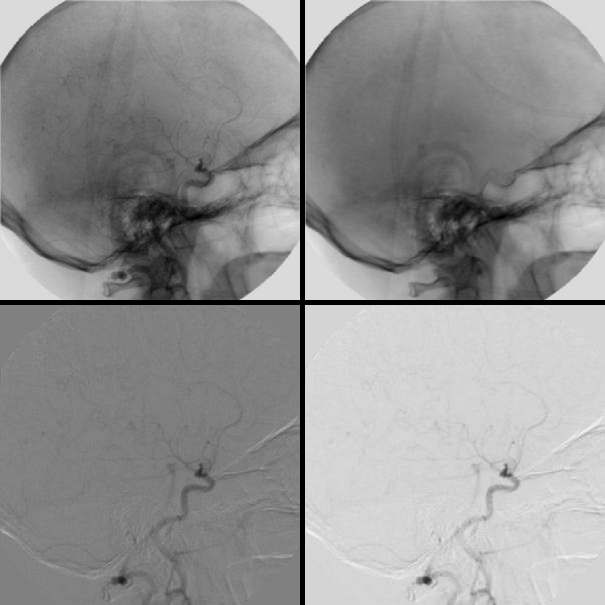

In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# LUT 생성 함수
def sigmoid_transform(a,c,LUT):
    i=0
    for i in range(0,256):
      s = i/255.0
      x = math.exp(-a*(s-c))
      tmp=255.0*(1.0/(1+x))
      if tmp>255 :
         tmp=255
      LUT[i]=tmp

# 그래프 생성
def view_1d(mat,size,data,DX,DY,yscale):
    cv2.rectangle(mat, (0,0), (256,256), (0,0,0), -1)
    i=0
    for i in range(0,size-1):
        cv2.line(mat,(DX+i,DY-yscale*data[i]),(DX+i+1,DY-yscale*data[i+1]),(0,128,0),2)

# 2차원 컬러 이미지 생성
view = np.zeros((256,256,3),np.uint8) 
LUT = np.zeros(256,np.uint8)

a = 8
c = 0.3
sigmoid_transform(a, c, LUT)
view_1d(view, 256, LUT, 0, 256, 1)

image1 = cv2.imread("/content/drive/MyDrive/python/data/의료영상데이타/angiography_live_image.bmp", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/drive/MyDrive/python/data/의료영상데이타/angiography_mask_image.bmp", cv2.IMREAD_GRAYSCALE)
dst = image1.copy()

#차영상 구하기
flat1 = np.array(image1)
flat1 = flat1.flatten()
flat2 = np.array(image2)
flat2 = flat2.flatten()

image3 = (flat1 - flat2)+128
image3 = np.clip(image3,0,255)
image3 = image3.reshape(420,420)

w = image3.shape[1]
h = image3.shape[0]

for i in range(0,h):
  for j in range(0,w): #power transform 대신에 sigmoid transform 프로그램이 필요.
    dst[i][j] = LUT[image3[i][j]]

image1 = cv2.resize(image1,(300,300))
image2 = cv2.resize(image2,(300,300))
image3 = cv2.resize(image3,(300,300))
dst = cv2.resize(dst,(300,300))

all = np.zeros((605,605), np.uint8)
all[0:300, 0:300] = image1
all[0:300, 305:605] = image2
all[305:605, 0:300] = image3
all[305:605, 305:605] = dst

cv2_imshow(all)
